# Введение

В ходе работы предстоит выяснить, какие игры лучше всего будут продаваться в 2017 году, отталкиваясь от исторических данных о продажах. Предстоит предобработать исходные данные, провести их исследовательский анализ, составить портреты продаж по регионам, а так же проверить ряд статистических гипотез. 

Исходный датасет выглядит следующим образом:
<ul>
    <li>Name — название игры</li>
    <li>Platform — платформа</li>
    <li>Year_of_Release — год выпуска</li>
    <li>Genre — жанр игры</li>
    <li>NA_sales — продажи в Северной Америке (миллионы долларов)</li>
    <li>EU_sales — продажи в Европе (миллионы долларов)</li>
    <li>Other_sales — продажи в других странах (миллионы долларов)</li>
    <li>ritic_Score — оценка критиков (максимум 100)</li>
    <li>User_Score — оценка пользователей (максимум 10)</li>
    <li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
    </ul>
    

# План работы

<strong> [Общая информация об исходных данных](#link0) </strong>

<strong>[Предобработка данных](#link1)</strong>

<strong>[Исследовательский анализ данных](#link2)</strong>

<strong>[Построение потретов пользователей каждого региона](#link3)</strong>

<strong>[Проверка гипотез](#link4)</strong>

<strong>[Итоговый вывод](#link5)</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as st

##  <a id="link0"> Общая информация об исходных данных </a>

Запишем исходные данные в датафрейм и изучим общую информацию:

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Небольшое количество пропусков обнаружено в столбцах с жанром, названием и годом выпуска игры. Суммарное их количество не превышает двух процентов от общего числа, от таким записей можно будет избавиться, предварительно убедившись, что появление пропусков в этих столбцах случайное.

В столбцах же с рейтингом критиков, пользователей, и рейтингом ESRB пристуствует довольно внушительное количество пропусков, избавиться от такого количества записей в исходном датафрейме не представляется возможным. Появление пропусков в данных столбцах для старых игр может быть обусловлено тем, что на момент их выхода просто не существовало этих систем рейтинга. Для относительно свежих игр, пропуски в значениях рейтингов могут быть обусловлены малой популярностью игр, их низкими продажами. В качестве еще одной альтернативной версии возникновения пропусков можно выдвинуть версию, что рейтинги собирались с определенных ресурсов, на которых просто не были представлены некоторые игры.

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Среди заполненных данных в столбцах с числовыми величинами не обнаружено аномальных значений.

## <a id="link1"> Предобработка данных </a>

Приведем названия столбцов к нижнему регистру:

In [5]:
games.columns = games.columns.str.lower()

Проверим данные с пропущенными значениями года выпуска игр:

In [6]:
games.query('year_of_release.isna()').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Как хорошо видно, пропуски в столбце с годом выпуска игры случайны, т.к в срезе с пропущенными значениями присутствуют все вариации платформ, жанров, продаж и рейтингов. Для некоторых записей из среза есть возможность восстановить значения года выпуска, в частности для игр спортивного жанра, которые содержат в своем названии наименование сезона, а выпускают их, как правило в год перед этим сезоном. Однако, для восстановления этих данных потребует использовать функцию с парсингом наименований, на мой взгляд такое решение выглядит избыточным для восстановления доли процента данных. Будем избавляться от всех записей, где не указан год выпуска.

In [7]:
games = games.query('(year_of_release.isna() == False) and (genre.isna() == False)')

Теперь можно привести значение столбца года выпуска игр в подобающий вид:

In [8]:
games.year_of_release = pd.to_datetime(games.year_of_release, format = '%Y', errors = 'coerce').dt.year

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обработаем значения 'tbd' в столбце с рейтингом пользователей, данная абревиатура расшифровывается как to be determinated - "будет определено". В таком случае, думаю правильно будет отнести данные значения к NaN. Напишем функцию для замены данных значений:

In [9]:
def tbd_to_nan(row):
    
    result = row['user_score']
    
    if row['user_score'] == 'tbd':
        
        result = float('nan')
        
    return result

In [10]:
games['user_score'] = games.apply(tbd_to_nan, axis = 1)

После замены приведем столбец с пользовательским рейтингом к числовому формату:

In [11]:
games['user_score'] = games['user_score'].astype('float64')

Заполнять значения рейтингов пользователей, критиков и ESRB считаю нецелесообразным, т.к каждая запись в датафрейме относится к определенной игре, которая не взаимосвязана с остальными, поэтому заполнение средним или медианой по жанру/году/платформе может довольно сильно исказить изначальные распределения данных величин.

Рассчитаем суммарные продажи игр по всем регионам:

In [12]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## <a id="link2"> Исследовательский анализ данных </a>

Построим гистограмму и график распределения вероятности для количества игр по годам:

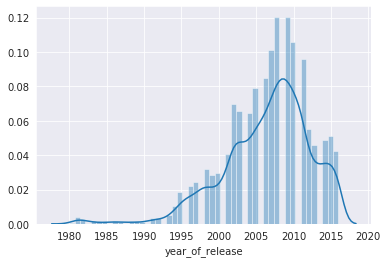

In [13]:
sns.set_style("darkgrid")

years_hist = sns.distplot(games.year_of_release, bins = 50)

Как видно, до 2009 года включительно, количество выпускаемых игр росло каждый год, однако с 2010 года наметился тренд на снижение количества выпускаемых на рынок игр.

Посмотрим, как этот факт сказывался на продажах:

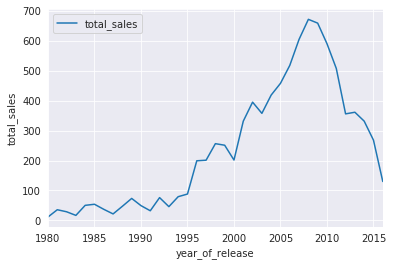

In [14]:
games.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot()

plt.ylabel('total_sales');

Совершенно очевидно, что между количеством выпускаемых на рынок игр и продажами на рынке существует прямая связь, т.к на 2016 год рынок находится на падении, то очевидно, что для прогноза не стоит рассматривать тот период времени, когда рынок был на подъеме. 

Рассмотрим 5 платформ с крупнейшими продажами, начиная с 1998 года. Для каждой платформы посмотрим графики зависимости совокупных продаж игр для платформы от года.

In [15]:
top5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5)

In [16]:
games_top5_platforms = games.query('(platform in @top5_platforms.index) and (year_of_release > 1998)')

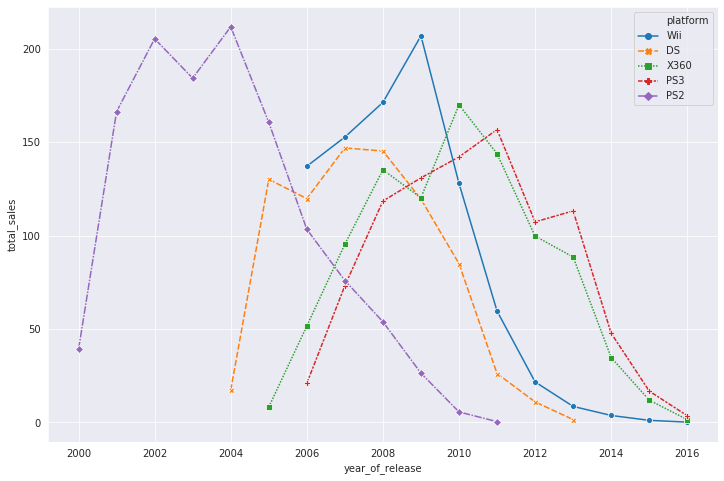

In [17]:
plt.figure(figsize = (12, 8))

sns.lineplot(x = games_top5_platforms.year_of_release, y = games_top5_platforms.total_sales, 
             hue = games_top5_platforms.platform,
             style = games_top5_platforms.platform,
             markers = True,
             estimator = sum, 
             ci = None)

plt.ylabel('total_sales');

Из полученных графиков можно сделать вывод, что с момента релиза платформа остается актуальной в течении 10-11 лет, однако только первые 5 лет сопровождаются ростом продаж, после этого периода продажи начинают снижаться.

Исходя из вышеполученных графиков можно сделать вывод о том, что для прогноза продаж на 2017 года, целесообразно будет использовать базовый период с 2010 по 2016 годы.

Сделаем срез изначального датафрейма, соответствующий обозначенному выше базовому периоду:

In [18]:
games_relevant = games.query('2010 <= year_of_release <= 2016')

Основываясь на данных выбранного периода построим графики продаж по платформам:

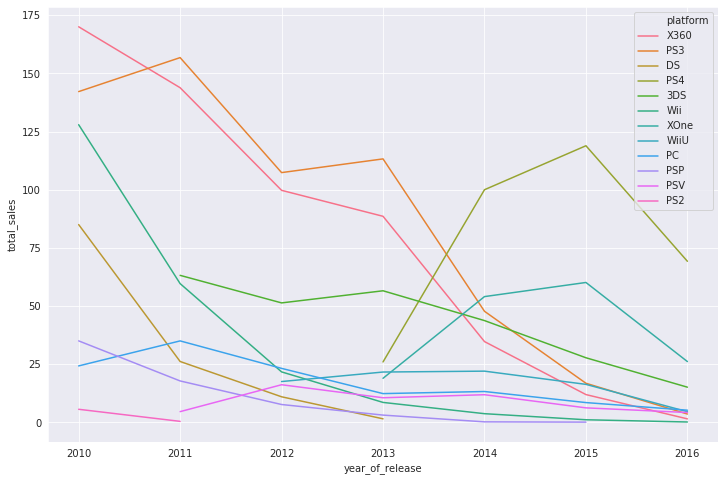

In [19]:
plt.figure(figsize = (12, 8))

sns.lineplot(x = games_relevant.year_of_release, y = games_relevant.total_sales, 
             hue = games_relevant.platform,
             estimator = sum,
             ci = None)

plt.ylabel('total_sales');


На сравнительном графике видно, что на 2015 год лидируют такие платформы, как PS4, XOne, 3DS, WiiU, PS3, X360. Однако из всех вышезназванных рост продаж показывают только PS4 и XOne, именно на них стоит сделать основную ставку при планировании продаж в 2017 году. Так же нельзя исключать, что в 2017 году неплохо будут продаваться игры на Nintentdo 3DS, не смотря на динамику снжения продаж в последнии годы, по абсолютным цифрам эта платформа довольно серьезно выделяется из группы отстающих.

Построим боксполт для продаж по каждой из платформ, для удобства масштабирования графика исключим из него выбросы. 
Выведем на экран описательную стастистику для данных распределений.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
DS,507.0,0.244083,0.815643,0.01,0.04,0.10,0.2000,15.13
PC,479.0,0.254614,0.530874,0.01,0.03,0.08,0.2300,5.14
PS2,45.0,0.135333,0.180638,0.01,0.02,0.06,0.1300,0.76
PS3,889.0,0.661125,1.459651,0.01,0.08,0.23,0.6800,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSP,500.0,0.128100,0.288250,0.01,0.02,0.05,0.1325,4.87
PSV,429.0,0.125431,0.212341,0.01,0.02,0.05,0.1300,1.96
Wii,450.0,0.495489,1.118375,0.01,0.08,0.18,0.4200,10.12


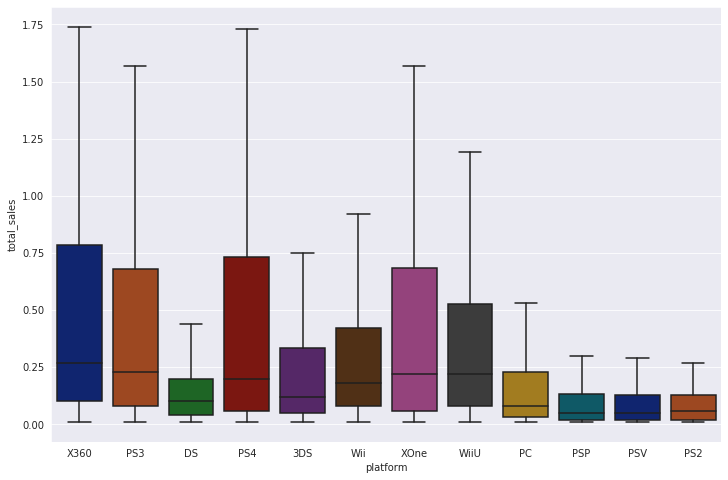

In [20]:
plt.figure(figsize = (12, 8));

sns.boxplot(x = games_relevant.platform, y = games_relevant.total_sales, palette = 'dark', showfliers=False);

games_relevant.groupby('platform')['total_sales'].describe()

Популярные платформы с большим количеством продаж имеют довольно большой разброс величины, сильное смещение среднего относительно медианы, и стандартное отклонение в несколько раз превосходящее среднее значение, очевидно это обусловлено наличием большого количества бестселлеров на этих платформах, которые в распределении величины являются выбросами.

Построим график на котором отобразим все выбросы:

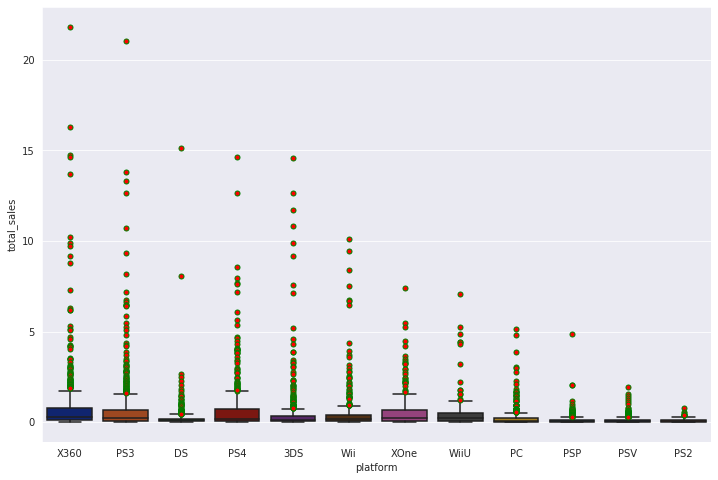

In [21]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=5,
                  linestyle='none', markeredgecolor='g')

plt.figure(figsize = (12, 8));

sns.boxplot(x = games_relevant.platform, y = games_relevant.total_sales, palette = 'dark', flierprops=flierprops);

График подтверждает, что распределения по продажам среди популярных платформ содержат большое количество выбросов.

Изучим, как влияют отзывы критиков и игроков на продажи, для анализа возьмем платформу Xbox 360:

Сделаем срез по играм данной платформы, а так же по интересующим нас столбцам с рейтингами и продажами:

In [22]:
games_xbox360 = games_relevant.query('platform == "X360"')[['critic_score','user_score','total_sales']]

Построим диаграммы рассеяния для суммарных продаж игр относительно рейтингов критиков и пользователей:

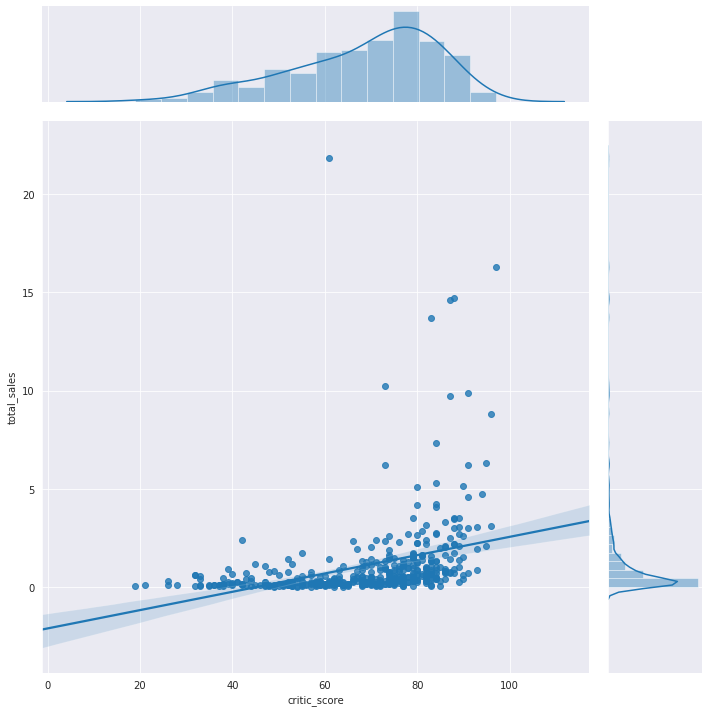

In [23]:
sns.jointplot(x=games_xbox360['critic_score'], y=games_xbox360['total_sales'], kind='reg', height = 10);

Как хорошо видно на графике, между рейтингом критиков и продажами сущетсвует линейная зависимость, но бывают и исключения - иногда бестселлерами становятся игры, средний рейтинг которых не превышает 60-80 пунктов

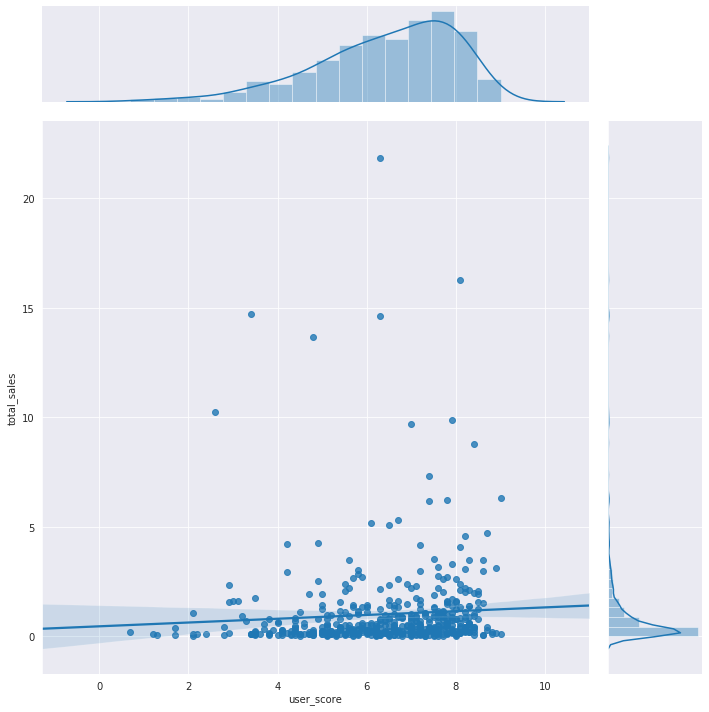

In [24]:
sns.jointplot(x=games_xbox360['user_score'], y=games_xbox360['total_sales'], kind='reg', height = 10);

Линейная зависимость продаж от пользовательских ценок тоже существует, но она гораздо слабее, чем от рейтинга критиков.

Посмотрим на матрицу корреляции:

In [25]:
games_xbox360.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.597552,0.340064
user_score,0.597552,1.000000,0.066035
total_sales,0.340064,0.066035,1.000000


Цифры полностью подтверждают увиденные нами на графиках результаты, связь между продажами игр Xbox360 и рейтингом критиков в 5 раз сильнее, чем связь между продажами и рейтингом пользователей.

Сгруппируем данные исходного датафрейма по платформам и посмотрим на связи рейтингов и продаж на других платформах:

In [26]:
games_relevant.groupby('platform')[['critic_score','user_score','total_sales']].corr()

critic_score  user_score  total_sales
platform                                                    
3DS      critic_score      1.000000    0.745222     0.348740
         user_score        0.745222    1.000000     0.222078
         total_sales       0.348740    0.222078     1.000000
DS       critic_score      1.000000    0.620256     0.280162
         user_score        0.620256    1.000000     0.251428
         total_sales       0.280162    0.251428     1.000000
PC       critic_score      1.000000    0.478158     0.336497
         user_score        0.478158    1.000000    -0.011087
         total_sales       0.336497   -0.011087     1.000000
PS2      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000     0.074724
         total_sales            NaN    0.074724     1.000000
PS3      critic_score      1.000000    0.595259     0.400594
         user_score        0.595259    1.000000     0.065092
         total_sales       0.400594    0.065092     1.000000
PS4      critic_score      1.000000    0.557654     0.406568
         user_score        0.557654    1.000000    -0.031957
         total_sales       0.406568   -0.031957     1.000000
PSP      critic_score      1.000000    0.521908     0.403225
         user_score        0.521908    1.000000     0.190636
         total_sales       0.403225    0.190636     1.000000
PSV      critic_score      1.000000    0.734300     0.131763
         user_score        0.734300    1.000000     0.013489
         total_sales       0.131763    0.013489     1.000000
Wii      critic_score      1.000000    0.471698     0.310588
         user_score        0.471698    1.000000     0.147160
         total_sales       0.310588    0.147160     1.000000
WiiU     critic_score      1.000000    0.770080     0.348380
         user_score        0.770080    1.000000     0.400219
         total_sales       0.348380    0.400219     1.000000
X360     critic_score      1.000000    0.597552     0.340064
         user_score        0.597552    1.000000     0.066035
         total_sales       0.340064    0.066035     1.000000
XOne     critic_score      1.000000    0.472462     0.416998
         user_score        0.472462    1.000000    -0.068925
         total_sales       0.416998   -0.068925     1.000000

В общем и целом, обозначенные для Xbox360 тенденции подтверждаются, однако стоит отметить, что для консолей, направленных на японский рынок, таких как, Nintendo 3DS, Nintendo DS, Wii, WiiU зависимость продаж от рейтинга пользователей сопоставима с зависимостью от рейтинга критиков.

Выясним, какие жанры игр пользуются популярностью среди игроков, для этого построим столбчатую диаграмму для продаж игр по каждому жанру: 

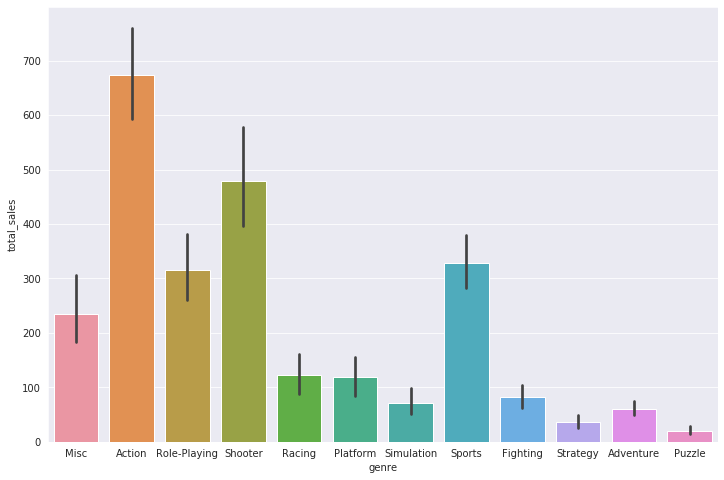

In [27]:
plt.figure(figsize = (12, 8))

sns.barplot(x = games_relevant.genre, y = games_relevant.total_sales, estimator = sum);

С большим отрывом среди жанров лидирует Action, за ним следуют жанры Shooter, Sports и RPG (Role-Playing). А вот жанры Stategy и Puzzle не пользуюся большой популярностью среди пользователей. Очевидно, что при планировании продаж на 2017 год стоит делать ставку на самые популярные жанры среди игроков.

## <a id="link3"> Построение портретов пользователей каждого региона </a>

Определим функцию, которая будет выводить на экран топ5 популярных платформ, топ5 популярных жанров со значениями доли продаж на рынке, а так же строить столбчатую по долям продаж на рынке для каждой категории рейтинга ESRB. Далее, нам потребуется передать этой функции только название региона.

In [28]:
def top5(region):
    
    platforms = ((games_relevant
                .groupby('platform')[str(region)+'_sales'].sum()/games_relevant[str(region)+'_sales'].sum())
                .sort_values(ascending = False).head(5))
    
    genres = ((games_relevant
                .groupby('genre')[str(region)+'_sales'].sum()/games_relevant[str(region)+'_sales'].sum())
                .sort_values(ascending = False).head(5))
    
    sns.barplot(x = games_relevant['rating'], y = games_relevant[str(region)+'_sales'], 
                estimator = lambda x: x.sum()/games_relevant[str(region)+'_sales'].sum());
    
    plt.ylabel('percentage_of_'+str(region)+'_sales')
    
    display(platforms)
    
    display(genres)

Потрет пользователя для региона Северной Америки:

platform
X360    0.295627
PS3     0.202803
Wii     0.107218
PS4     0.096195
XOne    0.082377
Name: na_sales, dtype: float64

genre
Action          0.257110
Shooter         0.210074
Sports          0.138720
Misc            0.109518
Role-Playing    0.099123
Name: na_sales, dtype: float64

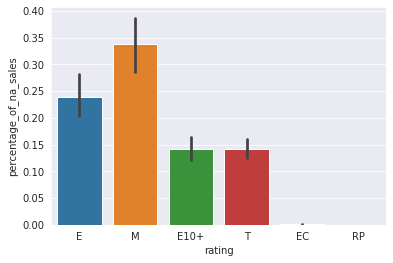

In [29]:
top5('na')

Самой популярной консолью последних 6 лет является Xbox360, в Северо-Американском регионе он опередил по продажам своего прямого конкурента - Playstation 3. Так же стоит отметить, что следующее поколение консоли Mircosoft, оказалось менее удачным и потеряло лидерство, уступив приставке от Sony.

Среди популярных жанров никаких сюрпризов, американцы отдают предпочтения тем же жанрам, что лидируют и в мире в целом, а именно Action, Shooter, Sports. 

Согласно рейтингу ESRB, большинство игр на американском рынке продается с рейтингом "M", т.е это игры предназначенные для взрослых с возрастным ограничением 17+. Это вполне логично соотносится со списком популярных жанров.

Вызовем функцию для построения портрета пользователя из Европы:

platform
PS3     0.253920
X360    0.194256
PS4     0.167723
PC      0.081811
Wii     0.078351
Name: eu_sales, dtype: float64

genre
Action          0.277731
Shooter         0.203814
Sports          0.138895
Role-Playing    0.089728
Misc            0.078565
Name: eu_sales, dtype: float64

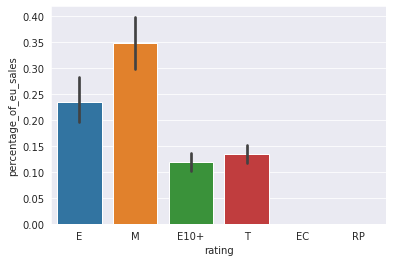

In [30]:
top5('eu')

В Европе же самой популярной консолью является Playstation 3, она занимает около 25% от всех продаж игр за последние 6 лет. При этом следующее поколение консоли - Playstation 4 занимает третье место в списке популярных консолей, при этом конкурент из Microsoft даже не попал в топ5, его место на европейском рынке занял PC.

Среди распределения продаж по жанрам европейский рынок практически полностью повторяет американский, здесь так же популярны Action, Shooter и Sports. В связи с этим нет различий и по долям продаж среди категорий рейтинга ESRB, они практически идентичны американским.

Посмотрим портер пользователя из Японии:

platform
3DS    0.329750
PS3    0.194206
PSP    0.138297
DS     0.091433
PSV    0.071574
Name: jp_sales, dtype: float64

genre
Role-Playing    0.339320
Action          0.236613
Misc            0.079603
Platform        0.051812
Adventure       0.051353
Name: jp_sales, dtype: float64

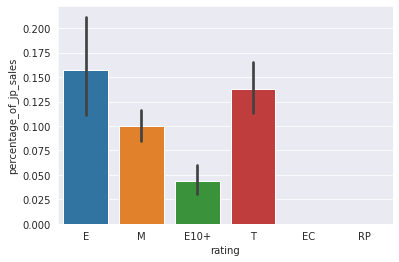

In [31]:
top5('jp')

Японский рынок кардинально отличается от американского и европейского. Самым популярным жанром здесь являются ролевые игры RPG, а жанр Shooter даже не попадет в топ5. Что же касается платформ, то здесь японцы являются приверженцами платформ собственно разработки, в топ5 попали только платформы от Nintendo и Sony. При этом, стоит отметить высокую популярность портативных консолей на японском рынке.

Что же касается долей продаж по категориям рейтинга ESRB, то здесь лидируют игры с рейтигом "E" - то есть без возрастных ограничений, далее идут игры с рейтигом 13+, и только потом игры, рассчитанные на взрослых. Из чего можно сделать вывод, что японская аудитория пользователей довольно молодая.

## <a id="link4" >Проверка гипотез </a>

<strong> Проверим гипотезу о том, что средние пользовательские рейтинги для платформ XOne и PC одинковые. </strong>

Сформулируем нулевую гипотезу: пусть H0 - средний пользовательский рейтинг игр для XOne равен среднему пользовательскому рейнигу игр для PC, тогда алтернативная гипотеза H1 будет означать, что средние рейтинги этих платформ различны.

Возьмем срезы пользовательских оценок игр по данным платформам:

In [32]:
xone_user_score = games_relevant.query('(platform == "XOne") and (user_score.isna() == False)')['user_score']

pc_user_score = games_relevant.query('(platform == "PC") and (user_score.isna() == False)')['user_score']

Для проверки гипотезы будем использовать ttest, уровень значимости зададим 5%:

In [33]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('Значение p-value равно', results.pvalue)

if results.pvalue > alpha:
    
    print('\nНе отвергаем нулевую гипотезу')
    
else:
    
    print('\nОтвергаем нулевую гипотезу')

Значение p-value равно 0.9801634129117883

Не отвергаем нулевую гипотезу


Сравним средние для обеих выборок:

In [34]:
print('Средний пользовательский рейтинг XOne', xone_user_score.mean())

print('\nСредний пользовательский рейтинг PC', pc_user_score.mean())

Средний пользовательский рейтинг XOne 6.521428571428572

Средний пользовательский рейтинг PC 6.5181818181818185


Как видно, значения средних для обеих выборок отличаются менее, чем на одну сотую. Это позволяет нам принять гипотезу о равенстве пользовательских оценок этих двух платформ.

<strong> Проверим гипотезу о том, что средний пользовательские рейтинги игр в жанрах Action и Sports разные. </strong>

За нулевую гипотезу H0 будем принимать равенство средних рейтингов игр Action и Sports, а в качестве альтернативной гипотезы H1 будет рассматриваться гипотеза о том, что эти рейтинги разные.

Сделаем срез по играм соответствующих жанров:

In [35]:
action_user_score = games_relevant.query('(genre == "Action") and (user_score.isna() == False)')['user_score']

sports_user_score = games_relevant.query('(genre == "Sports") and (user_score.isna() == False)')['user_score']

Проведет ttes для двух этих выборок и посмотрим на значения p-value, будем использовать ранее выбранный уровень значимости в 5%:

In [36]:
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('Значение p-value равно', results.pvalue)

if results.pvalue > alpha:
    
    print('\nНе отвергаем нулевую гипотезу')
    
else:
    
    print('\nОтвергаем нулевую гипотезу')

Значение p-value равно 1.4516152467844418e-15

Отвергаем нулевую гипотезу


По результатам теста значение p-value оказалось сильно меньше заданного уровня значимости alpha, что позволяет нам отвергнуть нулевую гипотезу и принять альтернативную.

Сравним средние значения рейтингов пользователей среди двух жанров и убедимся в том, что они действительно отличаются:

In [37]:
print('Средний пользовательский рейтинг игр жанра Action', action_user_score.mean())

print('\nСредний пользовательский рейтинг игр жанра Sports', sports_user_score.mean())

Средний пользовательский рейтинг игр жанра Action 6.781899871630296

Средний пользовательский рейтинг игр жанра Sports 5.901587301587302


Значения отличаются более чем на 10%!

# <a id="link5"> Итоговый вывод </a>

В ходе работы исходные данные были подготовлены к обработке, в последствии был проведен их исследовательский анализ, по результатам которого был выделен период с 2010 по 2016 год, как базовый период для планирования продаж игр на 2017 год.

По результатам анализа базового периода, были сделаны следующие выводы: в 2017 году следует делать ставку на продажи для платформ Playstation 4, Xbox One, Nintendo 3DS. Основными продаваемыми жанрами будут: Action, Shooter, Sports и Role-playing.

Для каждого из регионов (NA, EU, JP) составлен потрет пользователя, данные которого необходимо учитывать при составлении плана продаж в конкретном регионе.

Посредствам статистического анализа были проверены и приняты следующие гипотезы:
<ul>
    <li>"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"</li>
    <li>"Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные."</li>
    </ul>





